### IMPORT NECESSARY LIBRARIES

In [1]:
# For data manipulation and analysis
import pandas as pd

# For numerical operations
import numpy as np

# For creating visualizations
import matplotlib.pyplot as plt

# For statistical data visualization
import seaborn as sns

# For parsing strings containing Python expressions
import ast

# For handling date and time data
from datetime import datetime

### LOAD AND MERGE DATASETS

In [2]:
# Products dataframe
products = pd.read_csv(r"C:\Users\Black Concept\WorkSpace\ALTSCHOOL\Altschool-Africa-Second-Semester-Project\products.csv")

# Orders dataframe
orders = pd.read_csv(r"C:\Users\Black Concept\WorkSpace\ALTSCHOOL\Altschool-Africa-Second-Semester-Project\orders.csv")

# Line items dataframe
line_items = pd.read_csv(r"C:\Users\Black Concept\WorkSpace\ALTSCHOOL\Altschool-Africa-Second-Semester-Project\line_items.csv")

# Events dataframe
events = pd.read_csv(r"C:\Users\Black Concept\WorkSpace\ALTSCHOOL\Altschool-Africa-Second-Semester-Project\events.csv")

# Customers dataframe
customers = pd.read_csv(r"C:\Users\Black Concept\WorkSpace\ALTSCHOOL\Altschool-Africa-Second-Semester-Project\customers.csv")

We could begin merging the dataset immediately and do any cleaing that is necessary on the final merged data but I would love to take a look at the dataframes one after the other to have an overview of what I would be working with

In [3]:
# print first 5 rows
products.head()

,id,name,price
0,1,iPhone 13,1099.99
1,2,Samsung Galaxy S21,899.99
2,3,Sony PlayStation 5,499.99
3,4,Microsoft Xbox Series X,499.99
4,5,Nike Air Max 270,129.99


In [4]:
# print first 5 rows
orders.head()

,order_id,customer_id,status,checked_out_at
0,5e57de16-d33c-4126-bf0b-da65449cc3d1,4f4f5adc-1ca2-4b49-bac4-7b12d6d9d5cf,cancelled,2024-03-30 04:12:10.394413
1,62a67177-1d7f-44fe-86f8-622686d68f69,5cc88463-6a08-48b5-977c-9683a1c607b2,cancelled,2024-03-30 04:15:10.403885
2,9e950ce3-2e12-479c-a051-493c1a497d49,cda7bec0-7cbf-4145-baf9-e049bab94504,success,2024-03-30 04:19:10.406794
3,cddddfea-27ef-437f-817d-8f849d604c3c,e7f07fd1-05af-494a-ae5a-78c405b6f9c3,failed,2024-03-30 04:09:10.411149
4,170a66c8-6b39-468c-935c-445eb6be9fdf,873618f1-c201-4f8c-94bc-4cfc3d6d8cc8,cancelled,2024-03-30 04:09:10.412870


In [5]:
# print first 5 rows
line_items.head()

,line_item_id,order_id,item_id,quantity
0,3201,9e950ce3-2e12-479c-a051-493c1a497d49,4,2
1,3202,9e950ce3-2e12-479c-a051-493c1a497d49,5,4
2,3203,9e950ce3-2e12-479c-a051-493c1a497d49,9,5
3,3204,9e950ce3-2e12-479c-a051-493c1a497d49,12,1
4,3205,9e950ce3-2e12-479c-a051-493c1a497d49,6,2


In [6]:
# print first 5 rows
customers.head()

,customer_id,device_id,location,currency
0,4f4f5adc-1ca2-4b49-bac4-7b12d6d9d5cf,ef424b22-2393-4708-b065-c68152e8b377,Oman,USD
1,5cc88463-6a08-48b5-977c-9683a1c607b2,ba53d790-0cfc-4c00-9ab7-a6b104dceb65,United States of America,GBP
2,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,Saint Helena,NGN
3,e7f07fd1-05af-494a-ae5a-78c405b6f9c3,428688d6-31e6-4c73-a5d0-c8e849ccf6a3,Djibouti,NGN
4,873618f1-c201-4f8c-94bc-4cfc3d6d8cc8,1e939baf-c71d-444d-a832-d7dc3a6fcd0d,Guinea-Bissau,GBP


In [7]:
# print first 5 rows
events.head()

,event_id,customer_id,event_data,event_timestamp
0,14753,4f4f5adc-1ca2-4b49-bac4-7b12d6d9d5cf,"{""timestamp"": ""2024-03-21T12:47:11.012084"", ""e...",2024-03-21 12:47:11.012084
1,14754,4f4f5adc-1ca2-4b49-bac4-7b12d6d9d5cf,"{""timestamp"": ""2024-03-27T11:35:50.208930"", ""e...",2024-03-27 11:35:50.208930
2,14755,4f4f5adc-1ca2-4b49-bac4-7b12d6d9d5cf,"{""timestamp"": ""2024-03-30T04:03:10.392205"", ""e...",2024-03-30 04:03:10.392205
3,14756,4f4f5adc-1ca2-4b49-bac4-7b12d6d9d5cf,"{""item_id"": 12, ""quantity"": 5, ""timestamp"": ""2...",2024-03-30 04:03:10.394393
4,14757,4f4f5adc-1ca2-4b49-bac4-7b12d6d9d5cf,"{""item_id"": 11, ""quantity"": 1, ""timestamp"": ""2...",2024-03-30 04:03:10.394398


All of the datasets are looking okay from the look of things but the 'event_data' column in events dataframe is looking strange, let's inspect

In [8]:
# Inspect event_data column in events dataframe
events['event_data'].unique()

array(['{"timestamp": "2024-03-21T12:47:11.012084", "event_type": "visit"}',
       '{"timestamp": "2024-03-27T11:35:50.208930", "event_type": "visit"}',
       '{"timestamp": "2024-03-30T04:03:10.392205", "event_type": "visit"}',
       ...,
       '{"item_id": 1, "quantity": 3, "timestamp": "2024-03-30T04:03:18.224196", "event_type": "add_to_cart"}',
       '{"item_id": 1, "timestamp": "2024-03-30T04:03:18.224198", "event_type": "remove_from_cart"}',
       '{"status": "failed", "order_id": "ad73a2a0-354a-40bf-81cd-ff017ac859d5", "timestamp": "2024-03-30T04:14:18.224200", "event_type": "checkout"}'],
      dtype=object)

The event_data is a dictionary containing 'timestamp, event_type, item_id, status, order_id, quantity' and we already have some of these features in other dataframes except for 'event_type'. We will have to convert the event_data column to a dictinary and then extract the event_type data.

In [9]:
# Convert the event_data column to dictionary datatype so we can extract the event_type
events['event_data'] = events['event_data'].apply(ast.literal_eval)

In [10]:
# Create a new column for event_type in the events dataframe and drop the event_data that is a dictionary
events['event_type'] = events['event_data'].apply(lambda x: x.get('event_type'))

In [11]:
# Drop the event_data dataframe
events.drop('event_data', axis= 1, inplace= True)

In [12]:
# print first 5 rows
events.head()

,event_id,customer_id,event_timestamp,event_type
0,14753,4f4f5adc-1ca2-4b49-bac4-7b12d6d9d5cf,2024-03-21 12:47:11.012084,visit
1,14754,4f4f5adc-1ca2-4b49-bac4-7b12d6d9d5cf,2024-03-27 11:35:50.208930,visit
2,14755,4f4f5adc-1ca2-4b49-bac4-7b12d6d9d5cf,2024-03-30 04:03:10.392205,visit
3,14756,4f4f5adc-1ca2-4b49-bac4-7b12d6d9d5cf,2024-03-30 04:03:10.394393,add_to_cart
4,14757,4f4f5adc-1ca2-4b49-bac4-7b12d6d9d5cf,2024-03-30 04:03:10.394398,add_to_cart


We can now proceed with the merge operations as follows:

    1. Merge customers dataframe with events dataframe using customer_id

    2. Merge orders dataframe to the previous merge operation

    3. Merge line_items dataframe to the previous merge operation

    4. Merge products dataframe to the previous merge operation

I will be merging the datasets one after the other setting the how parameter to 'inner' so we can have just data points that are common and avoid null values as well.

In [13]:
# Merge customers df to events df
df = events.merge(customers, on='customer_id', how='inner')

In [14]:
# Merge orders dataframe to df
df2 = df.merge(orders, on='customer_id', how='inner')

In [15]:
# Merge line_items df to df2
df3 = df2.merge(line_items, on='order_id', how='inner')

In [16]:
# Print head to identify which column to merge the products df on
df3.head()

,event_id,customer_id,event_timestamp,event_type,device_id,location,currency,order_id,status,checked_out_at,line_item_id,item_id,quantity
0,14786,cda7bec0-7cbf-4145-baf9-e049bab94504,2024-03-26 22:05:58.863661,visit,33b485de-7338-4997-b1d0-b988ba17b245,Saint Helena,NGN,9e950ce3-2e12-479c-a051-493c1a497d49,success,2024-03-30 04:19:10.406794,3201,4,2
1,14786,cda7bec0-7cbf-4145-baf9-e049bab94504,2024-03-26 22:05:58.863661,visit,33b485de-7338-4997-b1d0-b988ba17b245,Saint Helena,NGN,9e950ce3-2e12-479c-a051-493c1a497d49,success,2024-03-30 04:19:10.406794,3202,5,4
2,14786,cda7bec0-7cbf-4145-baf9-e049bab94504,2024-03-26 22:05:58.863661,visit,33b485de-7338-4997-b1d0-b988ba17b245,Saint Helena,NGN,9e950ce3-2e12-479c-a051-493c1a497d49,success,2024-03-30 04:19:10.406794,3203,9,5
3,14786,cda7bec0-7cbf-4145-baf9-e049bab94504,2024-03-26 22:05:58.863661,visit,33b485de-7338-4997-b1d0-b988ba17b245,Saint Helena,NGN,9e950ce3-2e12-479c-a051-493c1a497d49,success,2024-03-30 04:19:10.406794,3204,12,1
4,14786,cda7bec0-7cbf-4145-baf9-e049bab94504,2024-03-26 22:05:58.863661,visit,33b485de-7338-4997-b1d0-b988ba17b245,Saint Helena,NGN,9e950ce3-2e12-479c-a051-493c1a497d49,success,2024-03-30 04:19:10.406794,3205,6,2


In [17]:
# Merge Products df to df3
final_df = df3.merge(products, left_on='item_id', right_on='id')

### DATA WRANGLING

Data wrangling, or data munging, is a crucial process in the data analytics workflow that involves cleaning, structuring, and enriching raw data to transform it into a more suitable format for analysis (Simplilearn, 2024).

To wrangle the merged datasets, I would do the following:

1. Data Cleaning:

    a. Check for missing values in each column and handle them appropriately.

    b. Remove any duplicate rows if present.

    c. Adjust observations where necessary e.g shortening Ids

2. Data Transformation:

    a. Convert data types of columns if necessary.

    b. Check for outliers and handle them using trimming or substitution method.

    c. Create any new features that might come in handy later on during analysis.

3. Data Formatting:

    a. Standardize column names if needed.
    
    b. Check categorical variables to see if they are consistent and suitbale for the kind of analysis I would be doing

1. DATA CLEANING

In [18]:
# print first 5 rows
final_df.head()

,event_id,customer_id,event_timestamp,event_type,device_id,location,currency,order_id,status,checked_out_at,line_item_id,item_id,quantity,id,name,price
0,14786,cda7bec0-7cbf-4145-baf9-e049bab94504,2024-03-26 22:05:58.863661,visit,33b485de-7338-4997-b1d0-b988ba17b245,Saint Helena,NGN,9e950ce3-2e12-479c-a051-493c1a497d49,success,2024-03-30 04:19:10.406794,3201,4,2,4,Microsoft Xbox Series X,499.99
1,14786,cda7bec0-7cbf-4145-baf9-e049bab94504,2024-03-26 22:05:58.863661,visit,33b485de-7338-4997-b1d0-b988ba17b245,Saint Helena,NGN,9e950ce3-2e12-479c-a051-493c1a497d49,success,2024-03-30 04:19:10.406794,3202,5,4,5,Nike Air Max 270,129.99
2,14786,cda7bec0-7cbf-4145-baf9-e049bab94504,2024-03-26 22:05:58.863661,visit,33b485de-7338-4997-b1d0-b988ba17b245,Saint Helena,NGN,9e950ce3-2e12-479c-a051-493c1a497d49,success,2024-03-30 04:19:10.406794,3203,9,5,9,Nintendo Switch,299.99
3,14786,cda7bec0-7cbf-4145-baf9-e049bab94504,2024-03-26 22:05:58.863661,visit,33b485de-7338-4997-b1d0-b988ba17b245,Saint Helena,NGN,9e950ce3-2e12-479c-a051-493c1a497d49,success,2024-03-30 04:19:10.406794,3204,12,1,12,Coca-Cola 12-Pack,5.99
4,14786,cda7bec0-7cbf-4145-baf9-e049bab94504,2024-03-26 22:05:58.863661,visit,33b485de-7338-4997-b1d0-b988ba17b245,Saint Helena,NGN,9e950ce3-2e12-479c-a051-493c1a497d49,success,2024-03-30 04:19:10.406794,3205,6,2,6,Adidas Ultraboost,180.00


In [19]:
# functioning for shortening id names in our dataset

def handle_id(df, column):
    """
    Extracts the last segment from each item in the specified column of a DataFrame,
    assuming items are strings separated by hyphens ('-'). It then replaces the values
    in the specified column with the extracted segments.

    Parameters:
        df (DataFrame): The pandas DataFrame containing the data.
        column (str): The name of the column in the DataFrame to be processed.

    Returns:
        None: The function modifies the DataFrame in place, replacing values in the
        specified column with the extracted segments.
    """
    lst = []
    for item in df[column]:
        values = item.split('-')[-1]
        lst.append(values)
    df[column] = lst

In [20]:
# Cleaning the different IDs in our dataset- customer_id, device_id, and order_id- by using the function above
columns_to_modify = ['customer_id', 'device_id', 'order_id']
for column in columns_to_modify:
    handle_id(final_df, column)

In [21]:
# Inspect dataframe to see if the chnages have been effected
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 578320 entries, 0 to 578319
Data columns (total 16 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   event_id         578320 non-null  int64  
 1   customer_id      578320 non-null  object 
 2   event_timestamp  578320 non-null  object 
 3   event_type       578320 non-null  object 
 4   device_id        578320 non-null  object 
 5   location         578320 non-null  object 
 6   currency         578320 non-null  object 
 7   order_id         578320 non-null  object 
 8   status           578320 non-null  object 
 9   checked_out_at   578320 non-null  object 
 10  line_item_id     578320 non-null  int64  
 11  item_id          578320 non-null  int64  
 12  quantity         578320 non-null  int64  
 13  id               578320 non-null  int64  
 14  name             578320 non-null  object 
 15  price            578320 non-null  float64
dtypes: float64(1), int64(5), object(10)
me

Upon inspection, I would have handled event_timestamp and checked_out_at columns to adjust the datatypes to datetime but the observations in the two columns will be used to generate new data later under feature engineering and thereafter be dropped. We can leave it for now to avoid repetitive actions.

In [22]:
# item_id and id are the same thing, let us drop id
final_df.drop('id', axis=1, inplace=True)

In [23]:
# Print first 5 rows
final_df.head()

,event_id,customer_id,event_timestamp,event_type,device_id,location,currency,order_id,status,checked_out_at,line_item_id,item_id,quantity,name,price
0,14786,e049bab94504,2024-03-26 22:05:58.863661,visit,b988ba17b245,Saint Helena,NGN,493c1a497d49,success,2024-03-30 04:19:10.406794,3201,4,2,Microsoft Xbox Series X,499.99
1,14786,e049bab94504,2024-03-26 22:05:58.863661,visit,b988ba17b245,Saint Helena,NGN,493c1a497d49,success,2024-03-30 04:19:10.406794,3202,5,4,Nike Air Max 270,129.99
2,14786,e049bab94504,2024-03-26 22:05:58.863661,visit,b988ba17b245,Saint Helena,NGN,493c1a497d49,success,2024-03-30 04:19:10.406794,3203,9,5,Nintendo Switch,299.99
3,14786,e049bab94504,2024-03-26 22:05:58.863661,visit,b988ba17b245,Saint Helena,NGN,493c1a497d49,success,2024-03-30 04:19:10.406794,3204,12,1,Coca-Cola 12-Pack,5.99
4,14786,e049bab94504,2024-03-26 22:05:58.863661,visit,b988ba17b245,Saint Helena,NGN,493c1a497d49,success,2024-03-30 04:19:10.406794,3205,6,2,Adidas Ultraboost,180.00


In [24]:
# Check for null values
final_df.isna().sum()

event_id           0
customer_id        0
event_timestamp    0
event_type         0
device_id          0
location           0
currency           0
order_id           0
status             0
checked_out_at     0
line_item_id       0
item_id            0
quantity           0
name               0
price              0
dtype: int64

In [25]:
# Check for duplicate entries
final_df.duplicated().sum()

0

2. DATA TRANSFORMATION

Data types conversion

    a. None except for event_timestamp and checked_out_at

quantity    Axes(0.125,0.53;0.775x0.35)
price       Axes(0.125,0.11;0.775x0.35)
dtype: object

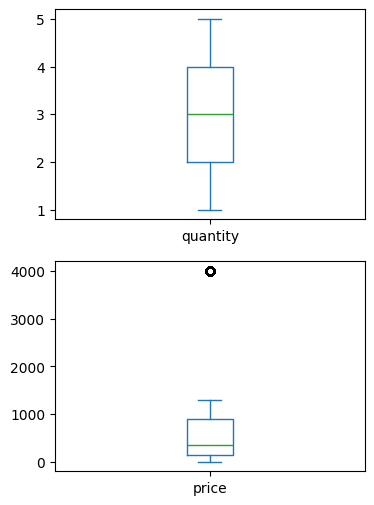

In [26]:
# Check for outliers in the necessary columns and handle them appropriately
features = ['quantity', 'price']
final_df[features].plot(kind='box', subplots=True, layout=(2,1), sharex=False, figsize=(4,6))

In [27]:
# Handle outliers in price column using IQR method

def remove_outliers(data, column):
    """
    Remove outliers from a DataFrame column using the IQR method.
    
    Parameters:
        data (DataFrame): The DataFrame containing the data.
        column (str): The name of the column containing the data to be cleaned.
    
    Returns:
        DataFrame: The DataFrame with outliers removed.
    """
    # Calculate quartiles
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    
    # Calculate IQR
    IQR = Q3 - Q1
    
    # Define outlier boundaries
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify outliers
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    
    # Remove outliers from the dataset
    cleaned_data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    
    return cleaned_data

In [28]:
# call the function above on the price column to handle the outliers in our dataset
clean_data = remove_outliers(final_df, 'price')

In [29]:
# print out the data without outliers
clean_data

,event_id,customer_id,event_timestamp,event_type,device_id,location,currency,order_id,status,checked_out_at,line_item_id,item_id,quantity,name,price
0,14786,e049bab94504,2024-03-26 22:05:58.863661,visit,b988ba17b245,Saint Helena,NGN,493c1a497d49,success,2024-03-30 04:19:10.406794,3201,4,2,Microsoft Xbox Series X,499.99
1,14786,e049bab94504,2024-03-26 22:05:58.863661,visit,b988ba17b245,Saint Helena,NGN,493c1a497d49,success,2024-03-30 04:19:10.406794,3202,5,4,Nike Air Max 270,129.99
2,14786,e049bab94504,2024-03-26 22:05:58.863661,visit,b988ba17b245,Saint Helena,NGN,493c1a497d49,success,2024-03-30 04:19:10.406794,3203,9,5,Nintendo Switch,299.99
3,14786,e049bab94504,2024-03-26 22:05:58.863661,visit,b988ba17b245,Saint Helena,NGN,493c1a497d49,success,2024-03-30 04:19:10.406794,3204,12,1,Coca-Cola 12-Pack,5.99
4,14786,e049bab94504,2024-03-26 22:05:58.863661,visit,b988ba17b245,Saint Helena,NGN,493c1a497d49,success,2024-03-30 04:19:10.406794,3205,6,2,Adidas Ultraboost,180.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578315,161958,3dbf43c85a9d,2024-03-30 04:03:18.224196,add_to_cart,ee544191fa1e,Christmas Island,USD,ff017ac859d5,failed,2024-03-30 04:14:18.224200,34941,1,3,iPhone 13,1099.99
578316,161959,3dbf43c85a9d,2024-03-30 04:03:18.224198,remove_from_cart,ee544191fa1e,Christmas Island,USD,ff017ac859d5,failed,2024-03-30 04:14:18.224200,34940,4,3,Microsoft Xbox Series X,499.99
578317,161959,3dbf43c85a9d,2024-03-30 04:03:18.224198,remove_from_cart,ee544191fa1e,Christmas Island,USD,ff017ac859d5,failed,2024-03-30 04:14:18.224200,34941,1,3,iPhone 13,1099.99
578318,161960,3dbf43c85a9d,2024-03-30 04:14:18.224200,checkout,ee544191fa1e,Christmas Island,USD,ff017ac859d5,failed,2024-03-30 04:14:18.224200,34940,4,3,Microsoft Xbox Series X,499.99


In [30]:
# function for creating new features in our dataset: day, month, year, and am_pm

def extract_date_features(date):
    """
    Extract name of day, name of month, year, and AM/PM from a datetime column.
    
    Parameters:
        date (Series): The datetime column to extract features from.
    
    Returns:
        DataFrame: A DataFrame containing the extracted features.
    """
    # Ensure the input is in datetime format
    date_column = pd.to_datetime(date, format='%Y-%m-%d %H:%M:%S.%f')

    # Extracting day name, month name, year, and AM/PM
    day_name = date_column.dt.strftime('%A')  # Full name of the day
    month_name = date_column.dt.strftime('%B')  # Full name of the month
    year = date_column.dt.year
    am_pm = date_column.dt.strftime('%p')

    # Extracting full date
    full_date = date_column.dt.strftime('%Y-%m-%d')

    # Create a DataFrame to store the features
    features_df = pd.DataFrame({'Day': day_name, 'Month': month_name, 'Year': year, 'AM/PM': am_pm, 'Date': full_date})

    return features_df

In [31]:
# Extract the datetime features
date_time_features = extract_date_features(clean_data['event_timestamp'])

In [32]:
# Merge the clean_data dataframe with the new features using their indexes
clean_data2 = clean_data.merge(date_time_features, left_index=True, right_index=True, how='inner')

In [33]:
# print the first 5 rows to see the result of the merge operation above
clean_data2.head()

,event_id,customer_id,event_timestamp,event_type,device_id,location,currency,order_id,status,checked_out_at,line_item_id,item_id,quantity,name,price,Day,Month,Year,AM/PM,Date
0,14786,e049bab94504,2024-03-26 22:05:58.863661,visit,b988ba17b245,Saint Helena,NGN,493c1a497d49,success,2024-03-30 04:19:10.406794,3201,4,2,Microsoft Xbox Series X,499.99,Tuesday,March,2024,PM,2024-03-26
1,14786,e049bab94504,2024-03-26 22:05:58.863661,visit,b988ba17b245,Saint Helena,NGN,493c1a497d49,success,2024-03-30 04:19:10.406794,3202,5,4,Nike Air Max 270,129.99,Tuesday,March,2024,PM,2024-03-26
2,14786,e049bab94504,2024-03-26 22:05:58.863661,visit,b988ba17b245,Saint Helena,NGN,493c1a497d49,success,2024-03-30 04:19:10.406794,3203,9,5,Nintendo Switch,299.99,Tuesday,March,2024,PM,2024-03-26
3,14786,e049bab94504,2024-03-26 22:05:58.863661,visit,b988ba17b245,Saint Helena,NGN,493c1a497d49,success,2024-03-30 04:19:10.406794,3204,12,1,Coca-Cola 12-Pack,5.99,Tuesday,March,2024,PM,2024-03-26
4,14786,e049bab94504,2024-03-26 22:05:58.863661,visit,b988ba17b245,Saint Helena,NGN,493c1a497d49,success,2024-03-30 04:19:10.406794,3205,6,2,Adidas Ultraboost,180.00,Tuesday,March,2024,PM,2024-03-26


In [34]:
# Get the number of days it took for each customer to check out their carts

# Convert the datetime columns to pandas datetime objects
clean_data2['checked_out_at'] = pd.to_datetime(clean_data2['checked_out_at'])
clean_data2['event_timestamp'] = pd.to_datetime(clean_data2['event_timestamp'])

# Calculate the duration between column_in and column_out in days
clean_data2['check_out_duration(days)'] = (clean_data2['checked_out_at'] - clean_data2['event_timestamp']).dt.days

In [35]:
# print the first 5 rows to confirm the column for checkout duration
clean_data2.head()

,event_id,customer_id,event_timestamp,event_type,device_id,location,currency,order_id,status,checked_out_at,...,item_id,quantity,name,price,Day,Month,Year,AM/PM,Date,check_out_duration(days)
0,14786,e049bab94504,2024-03-26 22:05:58.863661,visit,b988ba17b245,Saint Helena,NGN,493c1a497d49,success,2024-03-30 04:19:10.406794,...,4,2,Microsoft Xbox Series X,499.99,Tuesday,March,2024,PM,2024-03-26,3
1,14786,e049bab94504,2024-03-26 22:05:58.863661,visit,b988ba17b245,Saint Helena,NGN,493c1a497d49,success,2024-03-30 04:19:10.406794,...,5,4,Nike Air Max 270,129.99,Tuesday,March,2024,PM,2024-03-26,3
2,14786,e049bab94504,2024-03-26 22:05:58.863661,visit,b988ba17b245,Saint Helena,NGN,493c1a497d49,success,2024-03-30 04:19:10.406794,...,9,5,Nintendo Switch,299.99,Tuesday,March,2024,PM,2024-03-26,3
3,14786,e049bab94504,2024-03-26 22:05:58.863661,visit,b988ba17b245,Saint Helena,NGN,493c1a497d49,success,2024-03-30 04:19:10.406794,...,12,1,Coca-Cola 12-Pack,5.99,Tuesday,March,2024,PM,2024-03-26,3
4,14786,e049bab94504,2024-03-26 22:05:58.863661,visit,b988ba17b245,Saint Helena,NGN,493c1a497d49,success,2024-03-30 04:19:10.406794,...,6,2,Adidas Ultraboost,180.00,Tuesday,March,2024,PM,2024-03-26,3


In [36]:
# Make a duplicate of the dataframe so we can have an original copy after dropping 'event_timestamp' and 'checked_out_at'
clean_data3 = clean_data2

In [37]:
# print the head
clean_data3.head()

,event_id,customer_id,event_timestamp,event_type,device_id,location,currency,order_id,status,checked_out_at,...,item_id,quantity,name,price,Day,Month,Year,AM/PM,Date,check_out_duration(days)
0,14786,e049bab94504,2024-03-26 22:05:58.863661,visit,b988ba17b245,Saint Helena,NGN,493c1a497d49,success,2024-03-30 04:19:10.406794,...,4,2,Microsoft Xbox Series X,499.99,Tuesday,March,2024,PM,2024-03-26,3
1,14786,e049bab94504,2024-03-26 22:05:58.863661,visit,b988ba17b245,Saint Helena,NGN,493c1a497d49,success,2024-03-30 04:19:10.406794,...,5,4,Nike Air Max 270,129.99,Tuesday,March,2024,PM,2024-03-26,3
2,14786,e049bab94504,2024-03-26 22:05:58.863661,visit,b988ba17b245,Saint Helena,NGN,493c1a497d49,success,2024-03-30 04:19:10.406794,...,9,5,Nintendo Switch,299.99,Tuesday,March,2024,PM,2024-03-26,3
3,14786,e049bab94504,2024-03-26 22:05:58.863661,visit,b988ba17b245,Saint Helena,NGN,493c1a497d49,success,2024-03-30 04:19:10.406794,...,12,1,Coca-Cola 12-Pack,5.99,Tuesday,March,2024,PM,2024-03-26,3
4,14786,e049bab94504,2024-03-26 22:05:58.863661,visit,b988ba17b245,Saint Helena,NGN,493c1a497d49,success,2024-03-30 04:19:10.406794,...,6,2,Adidas Ultraboost,180.00,Tuesday,March,2024,PM,2024-03-26,3


In [38]:
# Drop 'event_timestamp' and 'checked_out_at'
clean_data3.drop(['event_timestamp','checked_out_at'], axis=1, inplace=True)

Lastly, I would love to take a very good look at the different features in the dataset above before proceeding to carry out exploratory data analysis to uncover patterns and insights in the data, I would love to drop some columns that are not needed, especially the 'IDs'. There is a lot of them and there is a possibility of not needing some of them.

We are not provided with the description for each of the features so its easy to decipher what each of them mean, I tried googling, tried Kaggle but couldn't find them. So, I will have to figure it out as follows:

1. event_id

2. customer_id

3. device_id

4. order_id

5. line_item_id

6. item_id

1. Event_id: Event type and Event Id are closely related. We have unique event types and each of those uniques are coded with IDs set as event_id. It would be wise to drop one of them and retain the other.

The focus of this analysis is solely on the understanding the customers better and it would be wise to know what kind of events bring them to the website(event type) but there is really no need encoding the event types in IDs anymore.

I will be dropping the event_id

In [39]:
# Compare event_id to event_type
clean_data3[['event_id', 'event_type']]

,event_id,event_type
0,14786,visit
1,14786,visit
2,14786,visit
3,14786,visit
4,14786,visit
...,...,...
578315,161958,add_to_cart
578316,161959,remove_from_cart
578317,161959,remove_from_cart
578318,161960,checkout


In [40]:
# Drop event_id column
clean_data3.drop('event_id', axis=1, inplace=True)

2. Customer_id: The core of our analysis revolves around the customers and this is the feature that uniquely identifies them. I will be keeping this

In [41]:
clean_data3[['customer_id']].head()

,customer_id
0,e049bab94504
1,e049bab94504
2,e049bab94504
3,e049bab94504
4,e049bab94504


3. device_id: I first suspected that the device id is representing the same thing name is representing but upon taking a look at the data below, I discovered that its a different case entirely. The name is representing the product names each customer bought.

On the other hand though, from the schema provided, each device id is associated with a customer which means we could use device Id to trace a customer id. I will be dropping device Id, the customer id is good enough.

In [42]:
# checking microsoft xbox series x to see if they would all have the same device id
clean_data3[clean_data3['name'] == 'Microsoft Xbox Series X']

,customer_id,event_type,device_id,location,currency,order_id,status,line_item_id,item_id,quantity,name,price,Day,Month,Year,AM/PM,Date,check_out_duration(days)
0,e049bab94504,visit,b988ba17b245,Saint Helena,NGN,493c1a497d49,success,3201,4,2,Microsoft Xbox Series X,499.99,Tuesday,March,2024,PM,2024-03-26,3
6,e049bab94504,visit,b988ba17b245,Saint Helena,NGN,493c1a497d49,success,3201,4,2,Microsoft Xbox Series X,499.99,Wednesday,March,2024,AM,2024-03-27,2
12,e049bab94504,visit,b988ba17b245,Saint Helena,NGN,493c1a497d49,success,3201,4,2,Microsoft Xbox Series X,499.99,Saturday,March,2024,AM,2024-03-30,0
18,e049bab94504,visit,b988ba17b245,Saint Helena,NGN,493c1a497d49,success,3201,4,2,Microsoft Xbox Series X,499.99,Saturday,March,2024,AM,2024-03-30,0
24,e049bab94504,add_to_cart,b988ba17b245,Saint Helena,NGN,493c1a497d49,success,3201,4,2,Microsoft Xbox Series X,499.99,Saturday,March,2024,AM,2024-03-30,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578310,3dbf43c85a9d,visit,ee544191fa1e,Christmas Island,USD,ff017ac859d5,failed,34940,4,3,Microsoft Xbox Series X,499.99,Saturday,March,2024,AM,2024-03-30,0
578312,3dbf43c85a9d,add_to_cart,ee544191fa1e,Christmas Island,USD,ff017ac859d5,failed,34940,4,3,Microsoft Xbox Series X,499.99,Saturday,March,2024,AM,2024-03-30,0
578314,3dbf43c85a9d,add_to_cart,ee544191fa1e,Christmas Island,USD,ff017ac859d5,failed,34940,4,3,Microsoft Xbox Series X,499.99,Saturday,March,2024,AM,2024-03-30,0
578316,3dbf43c85a9d,remove_from_cart,ee544191fa1e,Christmas Island,USD,ff017ac859d5,failed,34940,4,3,Microsoft Xbox Series X,499.99,Saturday,March,2024,AM,2024-03-30,0


In [43]:
# dropping device id
clean_data3.drop('device_id', axis=1, inplace=True)

4. order_id: order id is associated with orders, each order is tagged with an id but a closer look at the schema once again, we will discover that orders can be identified using both customer id(Who bought) and order id(What did who buy).

I will be dropping order_id also, I won't be needing it in my analysis.

In [44]:
# dropping  order_id
clean_data3.drop('order_id', axis=1, inplace=True)

5. line_items_id: By definition, Line items belong to an order and contain information about the purchasable added to the cart. They also contain information on the quantity of that purchasable as well as totals, tax, shipping, and promotion information that get used to calculate the line item total.

Line items id is used to identify each line item and I won't be needing it for my analysis upon looking at it side by side with the objectives of my analysis which would centre around visit frequency, location analysis, and overall purchase behaviour of customers.

In [45]:
# dropping line items id
clean_data3.drop('line_item_id', axis=1, inplace=True)

6. item_id: Item id and name (names of the products) are basically the same thing, I will dropping item_id and retain product names

In [46]:
# dropping item_id column
clean_data3.drop('item_id', axis=1, inplace=True)

In [47]:
# Check our dataset
clean_data3.head()

,customer_id,event_type,location,currency,status,quantity,name,price,Day,Month,Year,AM/PM,Date,check_out_duration(days)
0,e049bab94504,visit,Saint Helena,NGN,success,2,Microsoft Xbox Series X,499.99,Tuesday,March,2024,PM,2024-03-26,3
1,e049bab94504,visit,Saint Helena,NGN,success,4,Nike Air Max 270,129.99,Tuesday,March,2024,PM,2024-03-26,3
2,e049bab94504,visit,Saint Helena,NGN,success,5,Nintendo Switch,299.99,Tuesday,March,2024,PM,2024-03-26,3
3,e049bab94504,visit,Saint Helena,NGN,success,1,Coca-Cola 12-Pack,5.99,Tuesday,March,2024,PM,2024-03-26,3
4,e049bab94504,visit,Saint Helena,NGN,success,2,Adidas Ultraboost,180.00,Tuesday,March,2024,PM,2024-03-26,3


In [48]:
# rename the name column to product
clean_data3.rename({'name':'product'}, inplace=True)

In [49]:
# Confirm the change made by printing the head of our dataframe
clean_data3.head()

,customer_id,event_type,location,currency,status,quantity,name,price,Day,Month,Year,AM/PM,Date,check_out_duration(days)
0,e049bab94504,visit,Saint Helena,NGN,success,2,Microsoft Xbox Series X,499.99,Tuesday,March,2024,PM,2024-03-26,3
1,e049bab94504,visit,Saint Helena,NGN,success,4,Nike Air Max 270,129.99,Tuesday,March,2024,PM,2024-03-26,3
2,e049bab94504,visit,Saint Helena,NGN,success,5,Nintendo Switch,299.99,Tuesday,March,2024,PM,2024-03-26,3
3,e049bab94504,visit,Saint Helena,NGN,success,1,Coca-Cola 12-Pack,5.99,Tuesday,March,2024,PM,2024-03-26,3
4,e049bab94504,visit,Saint Helena,NGN,success,2,Adidas Ultraboost,180.00,Tuesday,March,2024,PM,2024-03-26,3


The column name has refused to chnage so I will be used another method, a bit crude but it works

In [50]:
# create a new column named product from the name column
clean_data3['product'] = clean_data3['name']

In [51]:
# confirm the new column
clean_data3.head()

,customer_id,event_type,location,currency,status,quantity,name,price,Day,Month,Year,AM/PM,Date,check_out_duration(days),product
0,e049bab94504,visit,Saint Helena,NGN,success,2,Microsoft Xbox Series X,499.99,Tuesday,March,2024,PM,2024-03-26,3,Microsoft Xbox Series X
1,e049bab94504,visit,Saint Helena,NGN,success,4,Nike Air Max 270,129.99,Tuesday,March,2024,PM,2024-03-26,3,Nike Air Max 270
2,e049bab94504,visit,Saint Helena,NGN,success,5,Nintendo Switch,299.99,Tuesday,March,2024,PM,2024-03-26,3,Nintendo Switch
3,e049bab94504,visit,Saint Helena,NGN,success,1,Coca-Cola 12-Pack,5.99,Tuesday,March,2024,PM,2024-03-26,3,Coca-Cola 12-Pack
4,e049bab94504,visit,Saint Helena,NGN,success,2,Adidas Ultraboost,180.00,Tuesday,March,2024,PM,2024-03-26,3,Adidas Ultraboost


In [52]:
# dropping the name column
clean_data3.drop('name', axis=1, inplace=True)

In [53]:
clean_data3.head()

,customer_id,event_type,location,currency,status,quantity,price,Day,Month,Year,AM/PM,Date,check_out_duration(days),product
0,e049bab94504,visit,Saint Helena,NGN,success,2,499.99,Tuesday,March,2024,PM,2024-03-26,3,Microsoft Xbox Series X
1,e049bab94504,visit,Saint Helena,NGN,success,4,129.99,Tuesday,March,2024,PM,2024-03-26,3,Nike Air Max 270
2,e049bab94504,visit,Saint Helena,NGN,success,5,299.99,Tuesday,March,2024,PM,2024-03-26,3,Nintendo Switch
3,e049bab94504,visit,Saint Helena,NGN,success,1,5.99,Tuesday,March,2024,PM,2024-03-26,3,Coca-Cola 12-Pack
4,e049bab94504,visit,Saint Helena,NGN,success,2,180.00,Tuesday,March,2024,PM,2024-03-26,3,Adidas Ultraboost


3. DATA FORMATTING

In [54]:
clean_data3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 538605 entries, 0 to 578319
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   customer_id               538605 non-null  object 
 1   event_type                538605 non-null  object 
 2   location                  538605 non-null  object 
 3   currency                  538605 non-null  object 
 4   status                    538605 non-null  object 
 5   quantity                  538605 non-null  int64  
 6   price                     538605 non-null  float64
 7   Day                       538605 non-null  object 
 8   Month                     538605 non-null  object 
 9   Year                      538605 non-null  int32  
 10  AM/PM                     538605 non-null  object 
 11  Date                      538605 non-null  object 
 12  check_out_duration(days)  538605 non-null  int64  
 13  product                   538605 non-null  object

In [86]:
# Convert the year feature to a string object
clean_data3['Year'] = clean_data3['Year'].astype(str)

A very good look at the formats of the various features in our data above shows that they are well formatted and our data has been cleaned successfully too.

### EXPLORATORY DATA ANALYSIS

Exploratory Data Analysis is a data analytics process used to understand the data in depth and learn the different data characteristics, often with visual means. This allows us to get a better feel of the data and find useful patterns in it, Simplilearn, 2024.

It is crucial to understand the data in depth before performing data analysis or building a model. Its important to know the patterns in our data and determine which variables are important and which do not play a significant role in the output. Further, some variables may have correlations with other variables.

This will be carried out as follows:

1. Non-Graphical Univariate Analysis

2. Graphical Univariate Analysis

3. Non-Graphical Multivariate Analysis

4. Graphical Multivariate analysis

1. NON-GRAPHICAL UNIVARIATE ANALYSIS

To carry out non-graphical univariate exploratory data analysis, it is important to get a brief overview of our dataset. I will be running the 4 basic commands needed to do this:

1. Check the head

2. Check the shape

3. Check the descriptive statistics

4. Check the info  

In [55]:
# Check the head of our dataset
clean_data3.head()

,customer_id,event_type,location,currency,status,quantity,price,Day,Month,Year,AM/PM,Date,check_out_duration(days),product
0,e049bab94504,visit,Saint Helena,NGN,success,2,499.99,Tuesday,March,2024,PM,2024-03-26,3,Microsoft Xbox Series X
1,e049bab94504,visit,Saint Helena,NGN,success,4,129.99,Tuesday,March,2024,PM,2024-03-26,3,Nike Air Max 270
2,e049bab94504,visit,Saint Helena,NGN,success,5,299.99,Tuesday,March,2024,PM,2024-03-26,3,Nintendo Switch
3,e049bab94504,visit,Saint Helena,NGN,success,1,5.99,Tuesday,March,2024,PM,2024-03-26,3,Coca-Cola 12-Pack
4,e049bab94504,visit,Saint Helena,NGN,success,2,180.00,Tuesday,March,2024,PM,2024-03-26,3,Adidas Ultraboost


A look at the top 5 rows in our dataset shows that we have the following features in our dataset:

1. customer_id: The unique identifier for each customer that visits the website

2. event_type: The nature of the activity of the customer on the website

3. location: The location of the customer

4. currency: The type of currency used for the transaction

5. status: The status of the purchase- successful or failed

6. quantity: The quantity of the purchase in numbers

7. price: The total price of the purchase/transaction made

8. Day: The day of the week the transaction took place

9. Month: The month the transaction took place

10. Year: The year the transaction took place

11. AM/PM: The time of day the transaction took place- morning or evening

12. Date: The full date of the transaction

13. check_out_duration(days): How long it took the customer to check out

14. product: The name of the items the customer bought

In [56]:
# Check the shape of the dataset
clean_data3.shape

(538605, 14)

The shape above shows that our dataset has 538605 observations and 14 features

In [57]:
# Check the descriptive statistics of the dataset
clean_data3.describe()

,quantity,price,Year,check_out_duration(days)
count,538605.000000,538605.000000,538605.0,538605.000000
mean,3.009142,464.667199,2024.0,0.452445
std,1.405937,397.553399,0.0,1.714673
min,1.000000,5.990000,2024.0,0.000000
25%,2.000000,149.950000,2024.0,0.000000
50%,3.000000,349.990000,2024.0,0.000000
75%,4.000000,799.990000,2024.0,0.000000
max,5.000000,1299.990000,2024.0,11.000000


The descriptive statistics generated by the describe function shows us non-graphical analysis for numerical features in our dataset

Individual statistical measures generated can also be calculated by using the following commands:

- df.count()
- df.mean()
- df.std()
- df.min()
- df.quantile([0.25, 0.5, 0.75], axis = 0)
- df.median()
- df.max()

The three measures for central tendency are the mode, mean and median. The command to determine the mode is:

- df.mode()
- df.mean()
- df.median()

In [58]:
# Check the info of the dataset
clean_data3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 538605 entries, 0 to 578319
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   customer_id               538605 non-null  object 
 1   event_type                538605 non-null  object 
 2   location                  538605 non-null  object 
 3   currency                  538605 non-null  object 
 4   status                    538605 non-null  object 
 5   quantity                  538605 non-null  int64  
 6   price                     538605 non-null  float64
 7   Day                       538605 non-null  object 
 8   Month                     538605 non-null  object 
 9   Year                      538605 non-null  int32  
 10  AM/PM                     538605 non-null  object 
 11  Date                      538605 non-null  object 
 12  check_out_duration(days)  538605 non-null  int64  
 13  product                   538605 non-null  object

The info command above shows the categorical and numerical features in our dataset. All of our features are object dtypes except for quantity, price, and check_out_duration(days).

We can also confirm that there are no missing values as well, we can confirm this by calling isnull below:

In [59]:
# Check null values
clean_data3.isnull().sum()

customer_id                 0
event_type                  0
location                    0
currency                    0
status                      0
quantity                    0
price                       0
Day                         0
Month                       0
Year                        0
AM/PM                       0
Date                        0
check_out_duration(days)    0
product                     0
dtype: int64

GRAPHICAL UNIVARIATE ANALYSIS

The graphical univariate analysis is usually useful for plotting the distributions of the various features in our data to see concepts like measures of central tendency, distribution, skew, outliers etc.

I will be:

1. Using histograms, box plots, and density plots to understand the distribution of numerical variables.

2. Create bar charts and pie charts to visualize categorical variables.

Using histograms, box plots, and density plots to understand the distribution of numerical variables.

The numerical variables are: quantity, price

array([[<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>],
       [<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>],
       [<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>]],
      dtype=object)

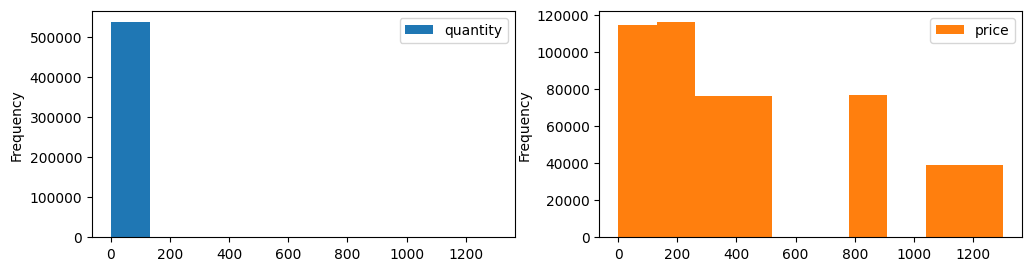

In [60]:
# Check the distribution of quantity and price using density plot
features = ['quantity', 'price']
clean_data3[features].plot(kind='hist', subplots=True, layout=(3, 2), sharex=False, figsize=(12, 10))

array([[<Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>]], dtype=object)

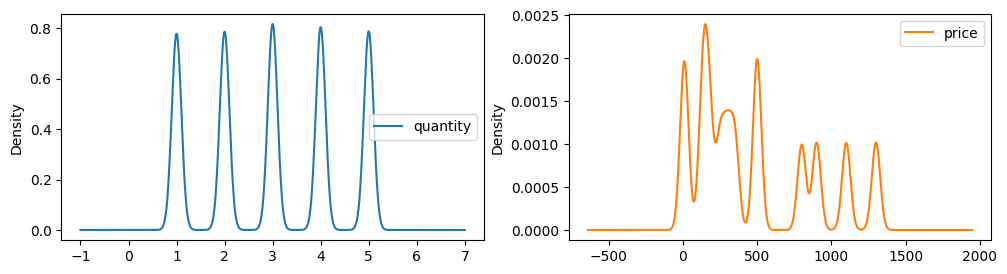

In [61]:
# Check the distribution of quantity and price using density plot
features = ['quantity', 'price']
clean_data3[features].plot(kind='density', subplots=True, layout=(3, 2), sharex=False, figsize=(12, 10))

quantity       Axes(0.125,0.653529;0.352273x0.226471)
price       Axes(0.547727,0.653529;0.352273x0.226471)
dtype: object

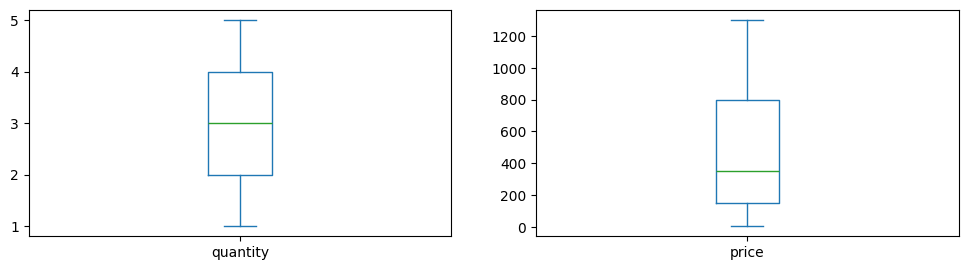

In [62]:
# Check for outliers in quantity and price using density plot
features = ['quantity', 'price']
clean_data3[features].plot(kind='box', subplots=True, layout=(3, 2), sharex=False, figsize=(12, 10))

Create bar charts to visualize categorical variables.

The categorical variables are: 'event_type', 'location', 'currency', 'status', 'Day', 'Month', 'Year', 'AM/PM', 'Date','check_out_duration(days)', 'product'

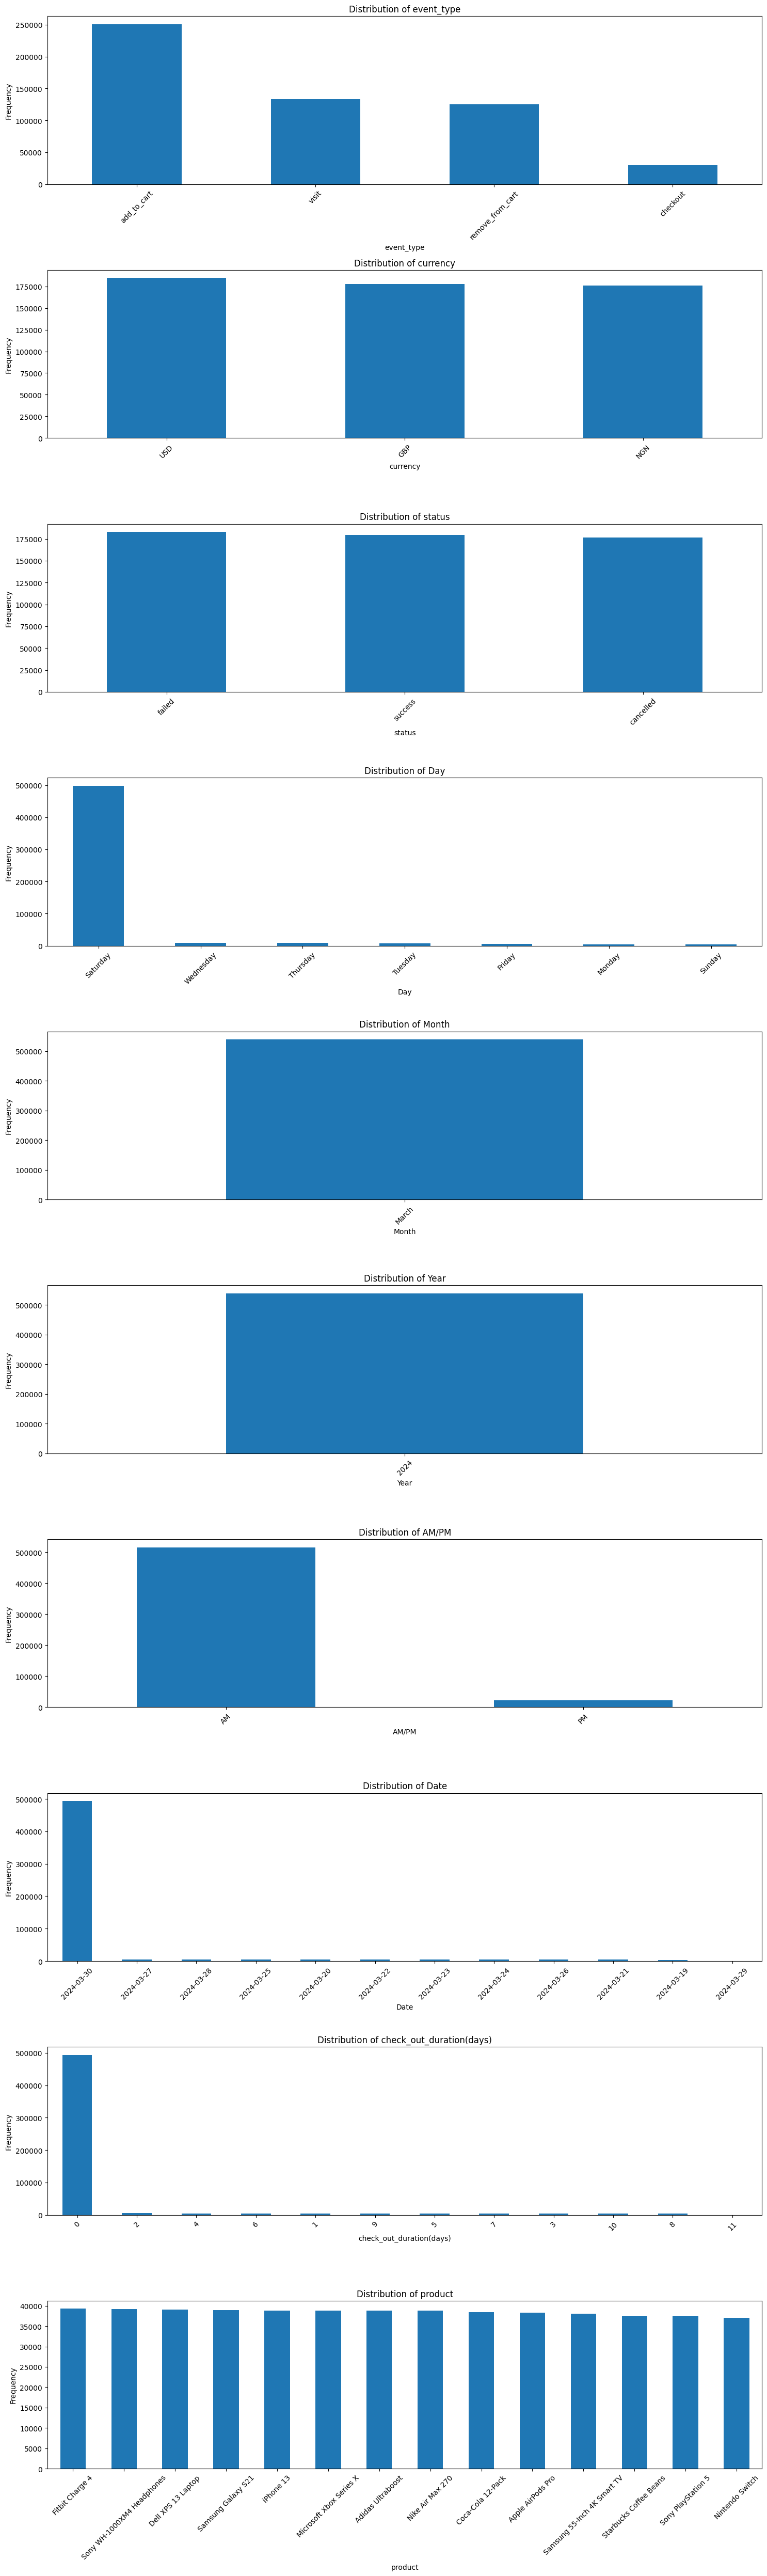

In [77]:
# Plot the categorical variables using bar charts
features_categorical = ['event_type', 'currency', 'status', 'Day', 'Month', 'Year', 'AM/PM', 'Date','check_out_duration(days)', 'product']

# Calculate the number of rows and columns for subplots
num_plots = len(features_categorical)
num_rows = num_plots
num_cols = 1

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

# Plot each categorical variable
for i, feature in enumerate(features_categorical):
    clean_data3[feature].value_counts().plot(kind='bar', ax=axes[i])
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')
    axes[i].tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()

In [79]:
# Get the unique locations
len(clean_data3['location'].unique())

243

We have 243 entries for the location where people visit the website from, it would be difficult to represent that on a plot.
I will be plotting the top 20 on a bar chart.

<Axes: xlabel='location'>

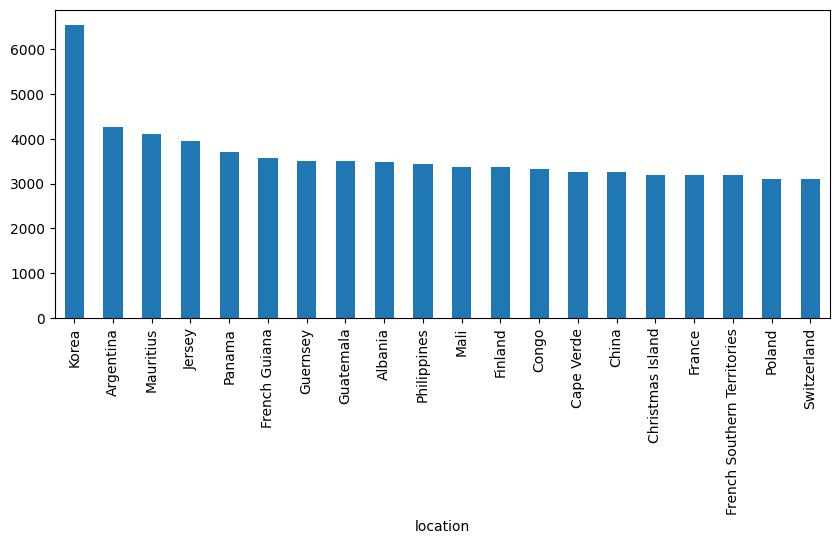

In [82]:
# Get the counts of each unique location
location_counts = clean_data3['location'].value_counts().sort_values(ascending=False)
location_counts.head(20).plot(kind='bar', figsize=(10,4))

NON-GRAPHICAL MULTIVARIATE ANALYSIS

The non-graphical multivariate analysis involves finding relationships between two of more features in our dataset. To achieve this, I will be getting correlation co-efficients.

In [87]:
# Correlation matrix for numeric features

# Excluding non-numeric columns
numeric_data = clean_data3.select_dtypes(include=['number'])

# Calculating correlation matrix
correlation_matrix = numeric_data.corr()

# Print correlation matrix
print(correlation_matrix)

                          quantity     price  check_out_duration(days)
quantity                  1.000000  0.004644                 -0.000371
price                     0.004644  1.000000                  0.002234
check_out_duration(days) -0.000371  0.002234                  1.000000


Explaining the correlation matrix generated above:

1. Quantity vs. Quantity:
   - The correlation of a variable with itself is always 1. So, the correlation of quantity with itself is 1. This is expected and indicates a perfect positive correlation, meaning that as one variable quantity increases, the other variable quantity also increases by a proportional amount.

2. Price vs. Price:
   - Similarly, the correlation of price with itself is 1. This also indicates a perfect positive correlation, implying that as price increases, price also increases proportionally.

3. Check-out Duration vs. Check-out Duration:
   - The correlation of check_out_duration(days) with itself is 1, which again indicates a perfect positive correlation. This means that as the check_out_duration(days) increases, the check_out_duration(days) also increases proportionally.

4. Quantity vs. Price:
   - The correlation between quantity and price is very close to zero (0.004644). This suggests a very weak positive correlation or almost no correlation at all between the quantity of items purchased and their price. In other words, there is little to no linear relationship between the quantity of items purchased and their price.

5. Quantity vs. Check-out Duration:
   - The correlation between quantity and check_out_duration(days) is very close to zero (-0.000371). This indicates a very weak negative correlation or almost no correlation between the quantity of items purchased and the check-out duration in days. In other words, there is little to no linear relationship between the quantity of items purchased and the time taken for check-out.

6. Price vs. Check-out Duration:
   - The correlation between price and check_out_duration(days) is very close to zero (0.002234). This suggests a very weak positive correlation or almost no correlation between the price of items and the check-out duration in days. In other words, there is little to no linear relationship between the price of items and the time taken for check-out.

GRAPHICAL MULTIVARIATE ANALYSIS

I will be utilising heatmaps, scatter plots, and jointplots to show relationships here

Text(0.5, 1.0, 'Correlation Heatmap')

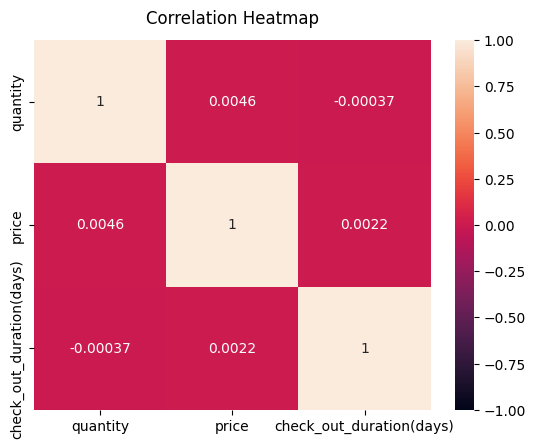

In [89]:
# Heatmap for the correlation between the numerical variables
heatmap = sns.heatmap(numeric_data.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

<Axes: xlabel='quantity', ylabel='price'>

C:\Users\Black Concept\AppData\Roaming\Python\Python312\site-packages\IPython\core\events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
C:\Users\Black Concept\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


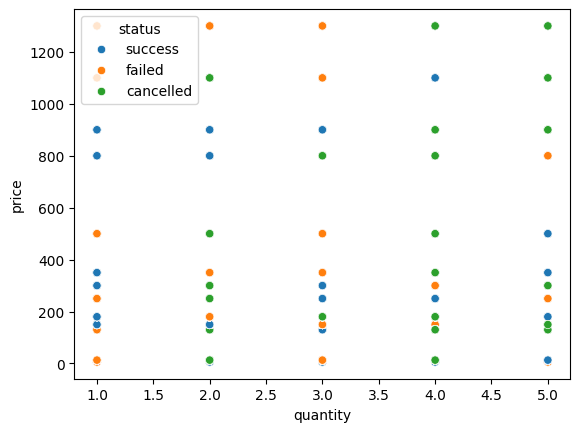

In [100]:
# Relationship between the quantity and price and the status of the event
sns.scatterplot(x='quantity',y='price',hue='status', data=clean_data3)

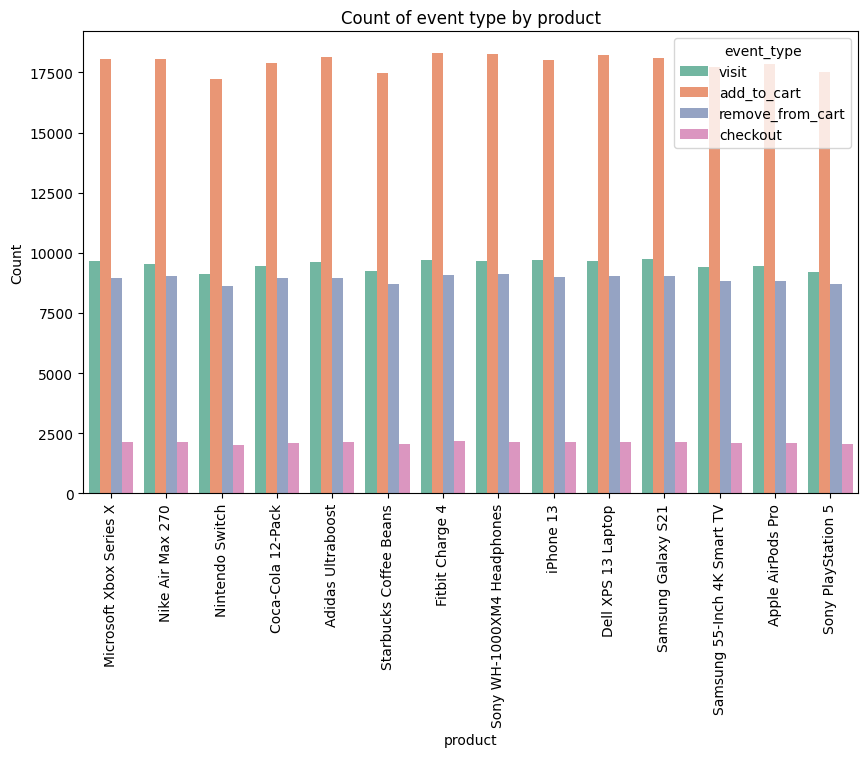

In [106]:
# Count of event type by product
plt.figure(figsize=(10, 6))
sns.countplot(data=clean_data3, x='product', hue='event_type', palette='Set2')
plt.title('Count of event type by product')
plt.xlabel('product')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.show()

C:\Users\Black Concept\AppData\Roaming\Python\Python312\site-packages\IPython\core\events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
C:\Users\Black Concept\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


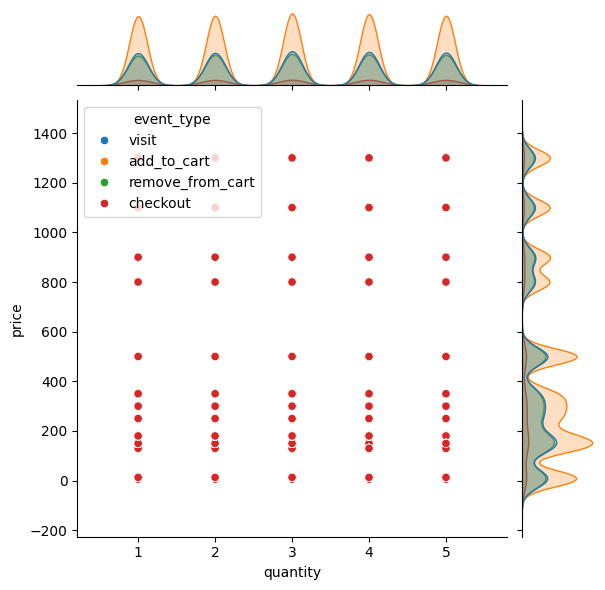

In [111]:
sns.jointplot(x = 'quantity', y = 'price', data = clean_data3, hue='event_type')

### ADDRESSING THE TASK GIVEN

Visit Frequency

To determine how often the customers visit the website, the following questions would be answered:

1. Identify the number of times each unique customer visits the website

2. Identify the time of the day they visit the most- morning or afternoon/evening

3. Identify the peak visit periods- monthly and weekly

4. Which location do customers visit from the most

In [124]:
# Number of times each unique customer visits the website
customer_visits = clean_data3.groupby('customer_id')['location'].value_counts().sort_values(ascending=False)
customer_visits

customer_id   location                   
1f57130130cb  Nauru                          360
d12e3eaca47d  Bolivia                        360
cc1402500ac7  Turkey                         348
5e5dc4f32b9c  French Southern Territories    348
1e5725fe2338  Saint Helena                   341
                                            ... 
0762df783312  Cayman Islands                   3
a90550a64d14  Bhutan                           3
2a295782dbbb  Martinique                       3
723d1881ab1f  Sri Lanka                        3
d36ee291c7cf  American Samoa                   3
Name: count, Length: 4574, dtype: int64

<Axes: xlabel='customer_id,location'>

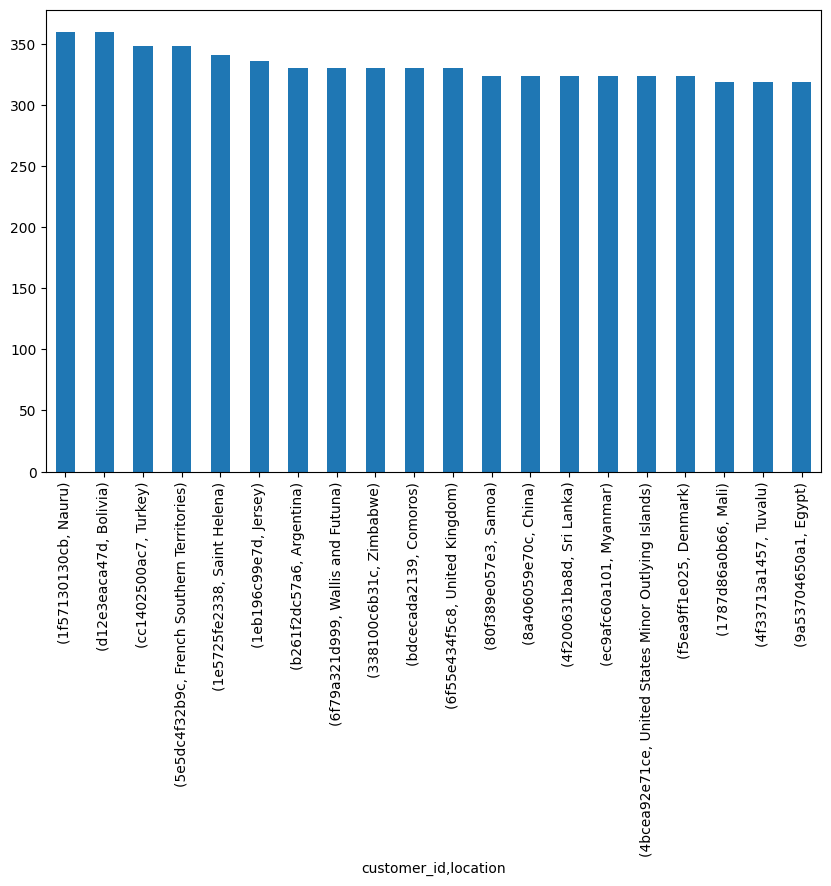

In [125]:
# Plot the top 20
customer_visits.head(20).plot(kind='bar', figsize=(10,6))

<Axes: xlabel='customer_id,location'>

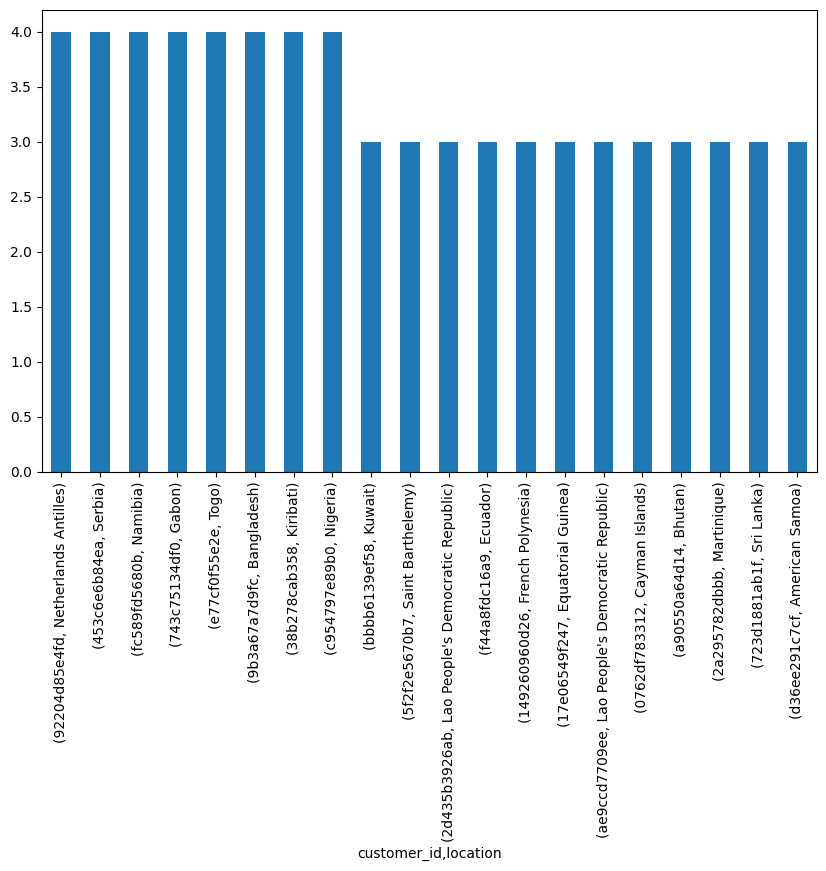

In [123]:
# Plot the bottom 20
customer_visits.tail(20).plot(kind='bar', figsize=(10,6))

<Axes: xlabel='AM/PM'>

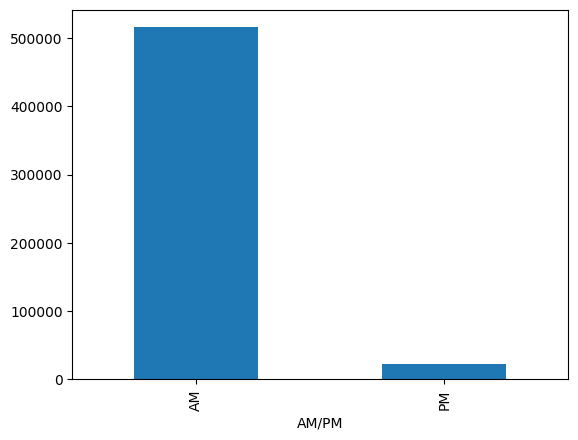

In [130]:
# What time of the day do they visit the most
time_of_day_visits = clean_data3['AM/PM'].value_counts().sort_values(ascending=False)
time_of_day_visits.plot(kind='bar')

<Axes: xlabel='Month'>

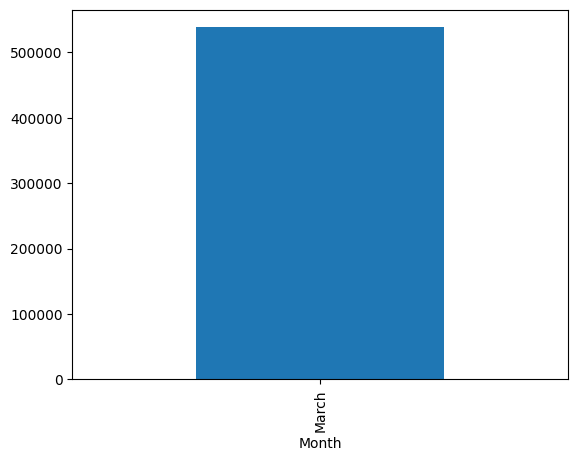

In [131]:
# Monthly peak visitation periods
monthly_freq = clean_data3['Month'].value_counts().sort_values(ascending=False)
monthly_freq.plot(kind='bar')

<Axes: xlabel='Year'>

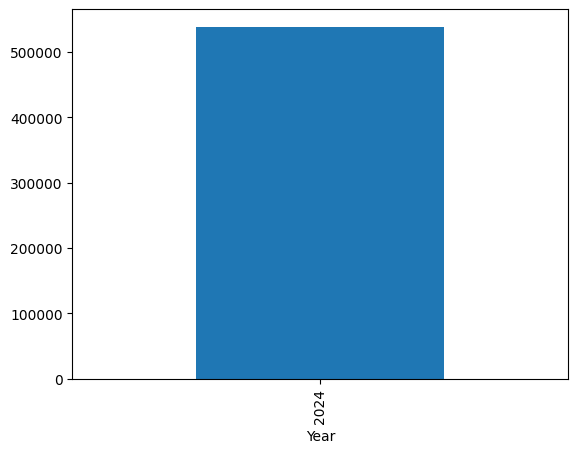

In [132]:
# Yearly peak visitation periods
yearly_freq = clean_data3['Year'].value_counts().sort_values(ascending=False)
yearly_freq.plot(kind='bar')

<Axes: xlabel='location'>

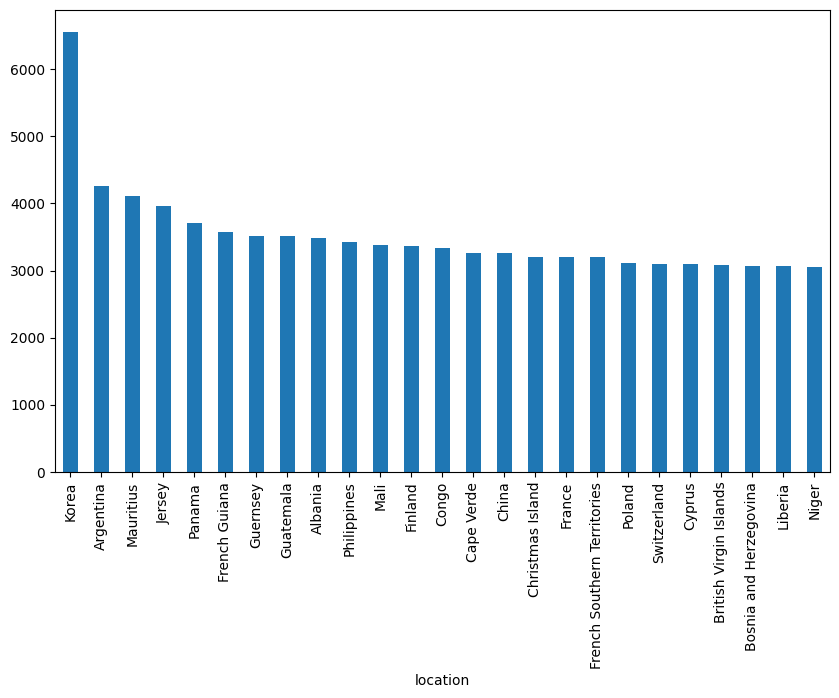

In [136]:
# What location do customers visit from the most?
location_freq = clean_data3['location'].value_counts().sort_values(ascending=False)

# Plot top 25
location_freq.head(25).plot(kind='bar', figsize=(10,6))

<Axes: xlabel='location'>

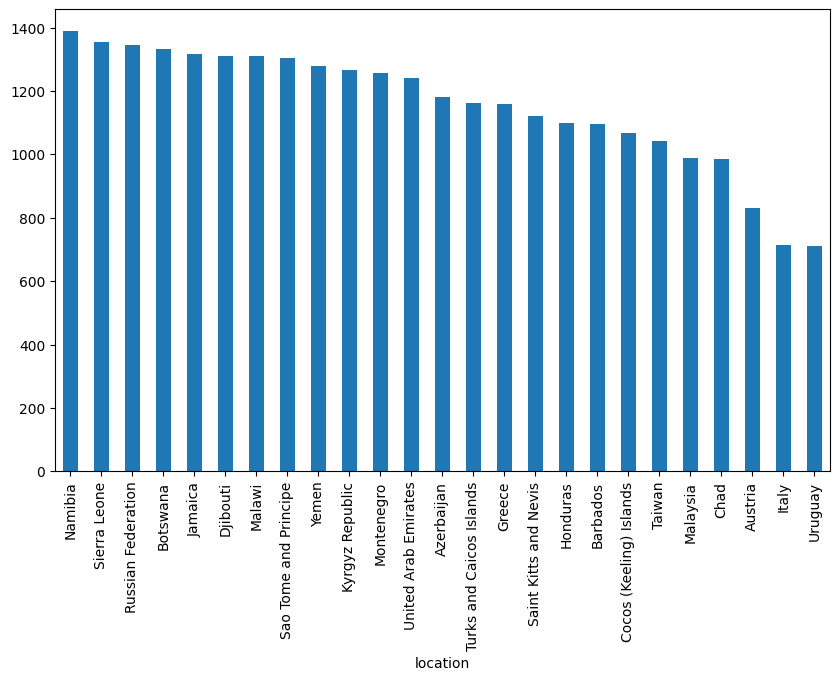

In [137]:
# Plot bottom 25
location_freq.tail(25).plot(kind='bar', figsize=(10,6))

Location Analysis

To determine the customers' locations and how that influences purchasing power, I will be answering the following questions:

1. Identify the unique locations

2. Identify different locations from which customers visit the most

3. Check for relationship between customer location and check out duration, status, event_type, quantity, and time they visit the most

4. Identify if some products are more popular in certain locations

In [141]:
# Unique locations
unique_locations = clean_data3.location.unique()
unique_locations

array(['Saint Helena', 'Djibouti', 'Ecuador', 'Mali', 'Grenada',
       'United States Minor Outlying Islands', 'Aruba', 'North Macedonia',
       'Germany', 'Saint Pierre and Miquelon', 'Sudan',
       'Christmas Island', 'Palestinian Territory', 'Qatar', 'Israel',
       'Netherlands Antilles', 'French Guiana', 'India', 'Switzerland',
       'Canada', 'Philippines', 'Micronesia', 'British Virgin Islands',
       'Barbados', 'Guadeloupe', 'Chad', 'Bouvet Island (Bouvetoya)',
       'Mauritania', 'Thailand', 'Tuvalu', 'Poland', 'Greenland',
       'Saint Martin', 'Guatemala', 'Bermuda', 'Australia', 'Malawi',
       'Mozambique', 'Costa Rica', 'Oman', 'Armenia', 'Tokelau',
       'Myanmar', 'Angola', 'Sierra Leone', 'Denmark',
       'Falkland Islands (Malvinas)', 'Taiwan', 'Norfolk Island', 'Egypt',
       'Yemen', 'Cocos (Keeling) Islands', 'Northern Mariana Islands',
       'Chile', 'Iraq', 'Antigua and Barbuda', 'Guam', 'Bahrain',
       'Singapore', 'Jordan', 'Serbia', 'Kazakhstan

In [142]:
# Number of unique locations
len(unique_locations)

243

Location Analysis

To determine the customers' locations and how that influences purchasing power, I will be answering the following questions:

1. Identify the unique locations

2. Identify different locations from which customers visit the most

3. Check for relationship between customer location and check out duration, status, event_type, quantity, and day they visit the most

4. Identify if some products are more popular in certain locations

Overall Purchase Behaviour

To derive insights from the customers' overall purchasing behaviour on the website, I will be answering the following questions:

1. Analyze the customers' purchasing strength using price of purchases, quantity, and event_type on the website

2. Calculate average purchases made by customers each day of the week, monthly, and yearly

3. Calculate average purchases by morning or afternoon/evening

4. Identify how long it takes customers to checkout based on their location

5. What products do the customers look for during the most visited periods

6. Analyze the event type, quantity, price, and product to understand purchasing behaviour

7. Generate marketing recommendations